# Task 3: Forest Cover Type Classification
### Description:
- Predict the type of forest cover based on cartographic and environmental features
- Dataset (Recommended): Covertype (UCI)
- Clean and preprocess the data including categorical handling
- Train and evaluate multi-class classification models
- Visualize confusion matrix and feature importance



### Step 1: Import Libraries

In [1]:
import pandas as pd       
import numpy as np        

import matplotlib.pyplot as plt   
import seaborn as sns             

from sklearn.model_selection import train_test_split   
from sklearn.preprocessing import StandardScaler       
from sklearn.tree import DecisionTreeClassifier        
from sklearn.ensemble import RandomForestClassifier    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  



### Step 2: Load Dataset

In [2]:
df = pd.read_csv(r'D:\eleevo internship\task3\covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### Step 3: Explore Dataset

In [4]:
# Shape of dataset 
print("Shape of dataset:", df.shape)


Shape of dataset: (581012, 55)


In [5]:
# Data types and non-null counts
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    5

In [6]:
# Quick statistics for numeric columns
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11            

In [8]:
# Distribution of target variable
print("\nTarget Variable Distribution:")
print(df['Cover_Type'].value_counts())


Target Variable Distribution:
Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


### Step 4: Preprocessing

In [9]:
# Since data is already numeric and clean so No categorical handling required, We only do scaling and train/test split.

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Scaling (important for models sensitive to feature scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete. Example row:", X_train_scaled[0][:10])

Features shape: (581012, 54)
Target shape: (581012,)
Training set size: 464809
Testing set size: 116203
Scaling complete. Example row: [0.75525225 0.20692539 0.78740593 0.00306814 0.02711962 0.26048483
 0.40615455 1.24861113 0.11638959 0.91724521]


### Step 5: Train Models


In [10]:
#Train and evaluate multi-class classification models

from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(
    n_estimators=100,      
    random_state=42,      
    n_jobs=2            
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

print("Model training complete.")


Model training complete.


### Step 6: Model Evaluation

In [11]:
# Evaluating model using, Accuracy Score, Classification Report and Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.9533

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203


Confusion Matrix:
[[39900  2366     1     0     6     2    93]
 [ 1305 55110   106     1    56    69    14]
 [    0   122  6859    23     7   140     0]
 [    0     0    57   471     0    21     0]
 [   25   385    20     0  1460     9     0]
 [    5    91   258    18     5  3096     0]
 [  197    28     0     0     0     0  3877]]


### Step 7: Visualize Confusion Matrix

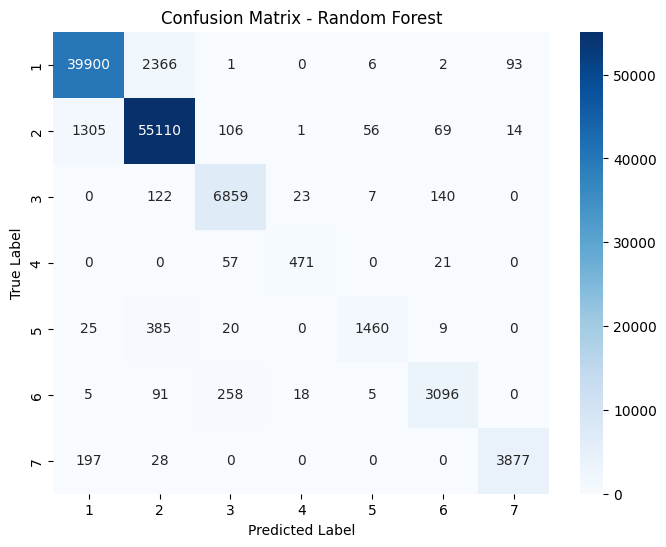

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Top 10 Important Features:
                              Feature  Importance
0                           Elevation    0.240072
5     Horizontal_Distance_To_Roadways    0.118071
9  Horizontal_Distance_To_Fire_Points    0.110950
3    Horizontal_Distance_To_Hydrology    0.060759
4      Vertical_Distance_To_Hydrology    0.057779
1                              Aspect    0.048021
7                      Hillshade_Noon    0.042969
6                       Hillshade_9am    0.041077
8                       Hillshade_3pm    0.040795
2                               Slope    0.032945


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2808\4231946829.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette="viridis")


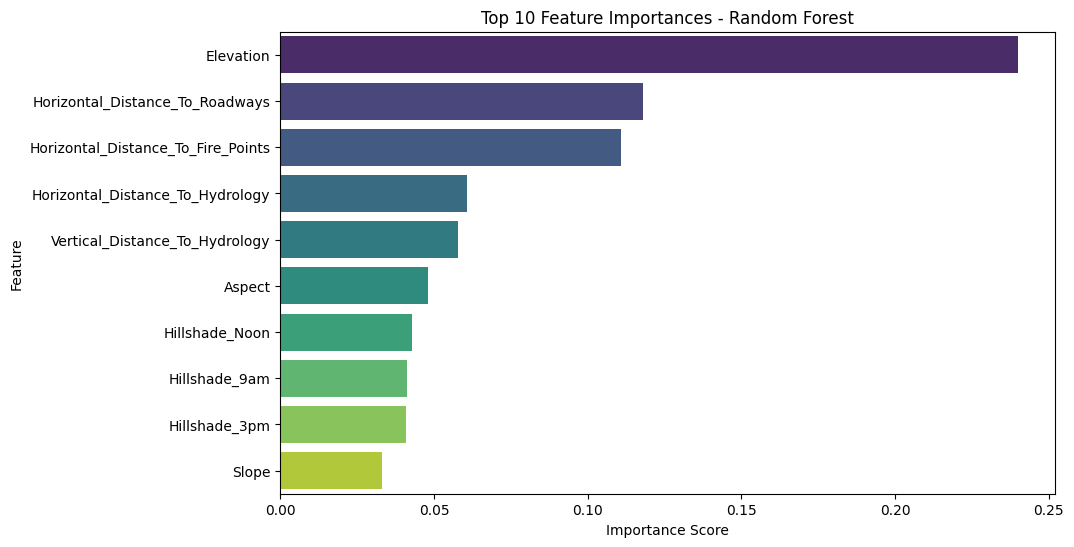

In [13]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(feat_imp_df.head(10))

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Summary of Task 3

---

## Task 3: Forest Cover Type Classification  

### Description:
- Dataset: `covtype.csv` (UCI Covertype)  
- Goal: Predict type of forest cover (7 classes) using cartographic & environmental features.  

### Steps & Outcomes:
1. **Preprocessing**
   - Dataset clean, no missing values.  
   - All features numeric → no categorical encoding needed.  
   - Train/Test Split:
     - Training: 464,809 samples  
     - Testing: 116,203 samples  
   - Features scaled using StandardScaler.  

2. **Model Training**
   - Algorithm: Random Forest Classifier  
   - Accuracy: **95.3%**  

3. **Evaluation**
   - Classification report:
     - Major classes (1,2) had Precision & Recall ~95–97%.  
     - Minority classes (4,5,6,7) had slightly lower recall (77–89%).  
   - Confusion Matrix:
     - Most errors between Class 1 & Class 2 (similar types of cover).  

4. **Feature Importance**
   - Top predictors:
     - **Elevation** (strongest predictor of vegetation type).  
     - **Distance to Roadways** (human influence on environment).  
     - **Distance to Fire Points** (fire risk affects vegetation).  

### Insights:
- Elevation is the **single most critical feature** in predicting forest cover type.  
- Random Forest achieved very high accuracy, but minority classes suffered from imbalance.  
- Confusion between similar cover types shows potential for improvement with advanced models.  
